# Electric Vehicle Population

[This dataset](https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data) shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [3]:
print("Count of duplicated: ",data.duplicated().sum())
data.describe()

Count of duplicated:  0


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
columns_to_drop = ['VIN (1-10)', 'Postal Code', 'State', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
data = data.drop(columns_to_drop, axis=1)

In [5]:
data.head()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,Thurston,Tumwater,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.0
1,Island,Clinton,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),0.0
2,Snohomish,Snohomish,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),266.0
3,King,Seattle,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322.0
4,Snohomish,Edmonds,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 135030 non-null  object 
 1   City                   135030 non-null  object 
 2   Model Year             135038 non-null  int64  
 3   Make                   135038 non-null  object 
 4   Model                  134789 non-null  object 
 5   Electric Vehicle Type  135038 non-null  object 
 6   Electric Range         135037 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.2+ MB


In [7]:
data['Make'].value_counts()

TESLA                   61808
NISSAN                  13150
CHEVROLET               11437
FORD                     6897
BMW                      5895
KIA                      5491
TOYOTA                   4883
VOLKSWAGEN               3526
VOLVO                    3221
AUDI                     2727
JEEP                     2615
HYUNDAI                  2395
CHRYSLER                 2237
RIVIAN                   1806
PORSCHE                   952
FIAT                      807
HONDA                     787
MERCEDES-BENZ             777
MITSUBISHI                748
MINI                      742
POLESTAR                  658
SMART                     277
SUBARU                    272
JAGUAR                    222
LINCOLN                   212
LUCID                     141
CADILLAC                  120
LEXUS                      80
GENESIS                    67
LAND ROVER                 43
FISKER                     15
MAZDA                      12
AZURE DYNAMICS              8
TH!NK     

In [8]:
data['Electric Range'].mean()

74.59196368402733

In [9]:
data['City'].value_counts()

Seattle          23489
Bellevue          6960
Redmond           4965
Vancouver         4819
Kirkland          4201
                 ...  
Frederick            1
South Prairie        1
Decatur              1
Goldsboro            1
Gardena              1
Name: City, Length: 651, dtype: int64

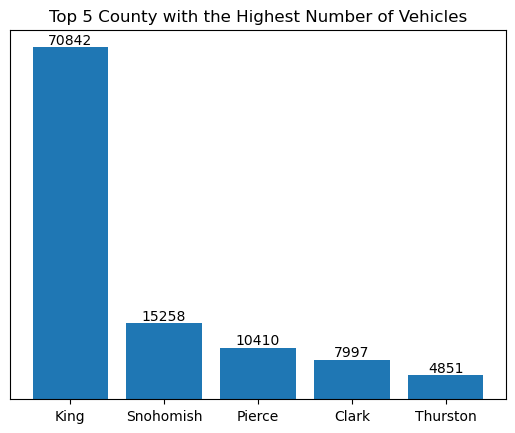

In [10]:
top_5_county = data['County'].value_counts().head(5)

plt.bar(top_5_county.index, top_5_county)
plt.title('Top 5 County with the Highest Number of Vehicles')

for i, v in enumerate(top_5_county):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.yticks([])

plt.show()

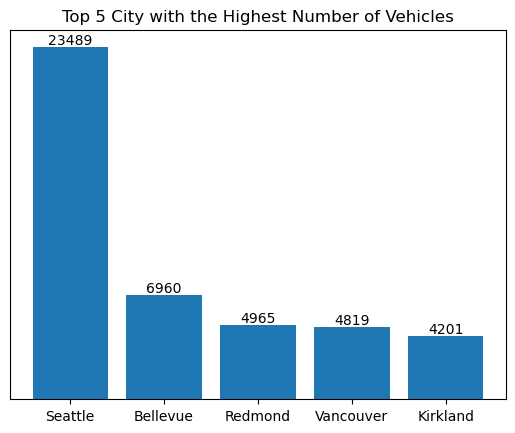

In [11]:
top_5_city = data['City'].value_counts().head(5)

plt.bar(top_5_city.index, top_5_city)
plt.title('Top 5 City with the Highest Number of Vehicles')

for i, v in enumerate(top_5_city):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.yticks([])

plt.show()

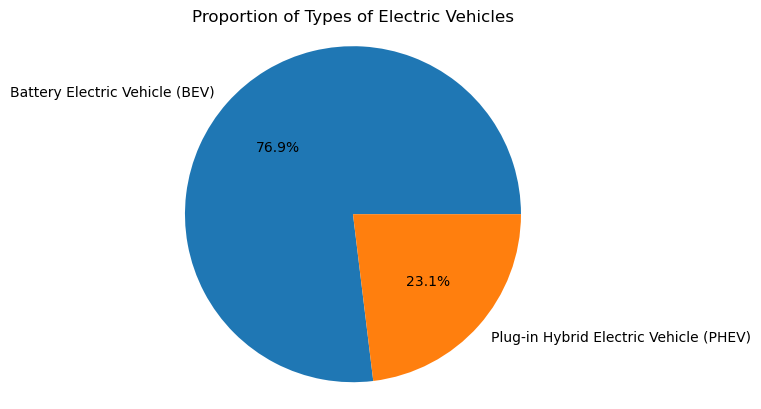

In [12]:
electric_vehicle_types = data['Electric Vehicle Type'].value_counts()

plt.pie(electric_vehicle_types, labels=electric_vehicle_types.index, autopct='%1.1f%%')
plt.title('Proportion of Types of Electric Vehicles')
plt.axis('equal')

plt.show()

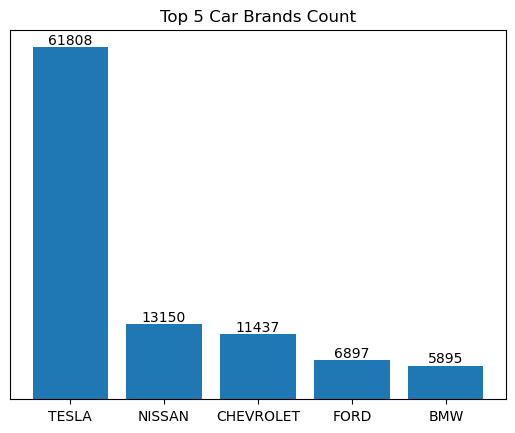

In [13]:
top_5_makes = data['Make'].value_counts().head(5)

plt.bar(top_5_makes.index, top_5_makes)
plt.title('Top 5 Car Brands Count')

for i, v in enumerate(top_5_makes):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.yticks([])

plt.show()

In [14]:
tesla_models = data[data['Make'] == 'TESLA']['Model'].value_counts()

df = pd.DataFrame({'Tesla Model': tesla_models.index, 'Count': tesla_models.values})
print(df)

  Tesla Model  Count
0     MODEL 3  25837
1     MODEL Y  23577
2     MODEL S   7473
3     MODEL X   4874
4    ROADSTER     47


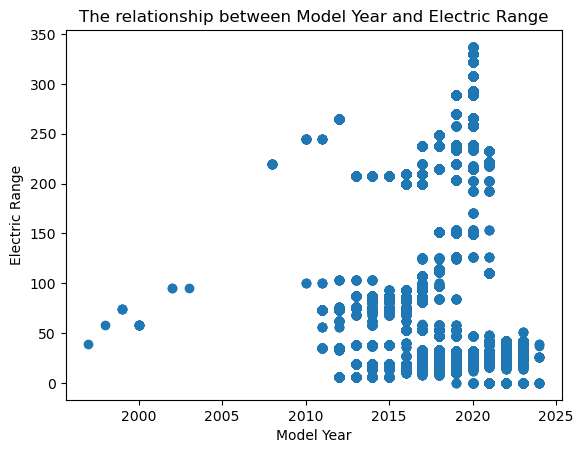

In [15]:
plt.scatter(data['Model Year'], data['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('The relationship between Model Year and Electric Range')
plt.show()

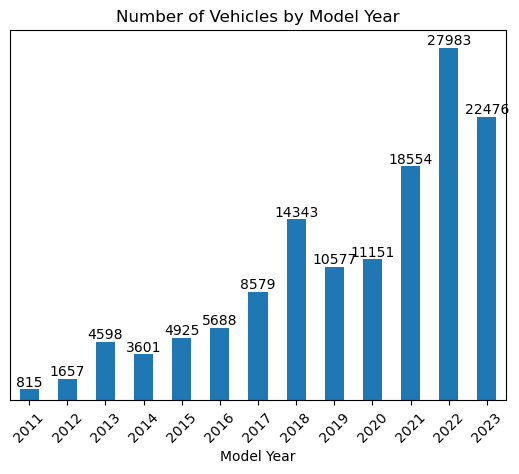

In [16]:
model_year_counts = data['Model Year'].value_counts().sort_index()
model_year_counts.loc[2011:2023].plot(kind='bar')
plt.xlabel('Model Year')
plt.title('Number of Vehicles by Model Year')
plt.yticks([])

# Customize x-axis tick labels
plt.xticks(rotation=45)

# Add value labels to the bars
for i, v in enumerate(model_year_counts.loc[2011:2023]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()